# Tuning synthetic data with fista algorithm

In [7]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from matplotlib.ticker import MaxNLocator

from Function import *
from skimage.metrics import structural_similarity as ssim

import scipy

## Load synthetic data

In [8]:
data_name = 'data.npy'
x = np.load('../Desarrollo/ReDS/data/' + data_name)
if len(x.shape) > 2:
    x = x[:, :, int(x.shape[-1] / 2)]

if data_name == 'data.npy':
    x = x.T
x = x / np.abs(x).max()

## Visualize data

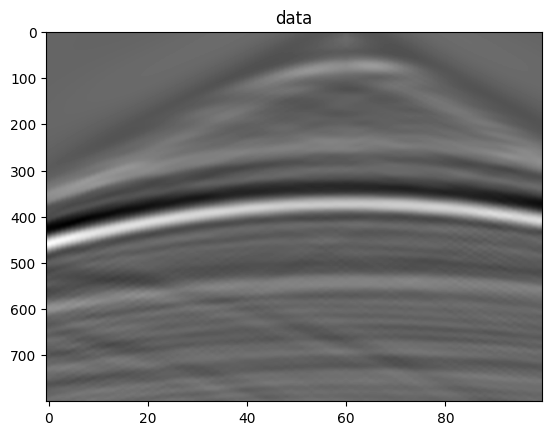

(<matplotlib.image.AxesImage at 0x2143f60dee0>, Text(0.5, 1.0, 'data'), None)

In [9]:
plt.imshow(x, cmap='gray', aspect='auto'), plt.title('data'), plt.show()

## Sampling data

In [10]:
sr_rand = 0.5  # 1-compression
y_rand, pattern_rand, pattern_index = random_sampling(x, sr_rand, seed=0)
H = pattern_index

## Recovery algorithm FISTA

In [11]:
case = 'FISTA'
mu = 0.39
max_itr = 300

alg = Algorithms(x, H, 'DCT2D', 'IDCT2D', print_info=False)
lmbs = np.logspace(np.log10(1), np.log10(20), 15)

parameters = {}
performances = []
for num_run, lmb in enumerate(product(lmbs)):
    print(f'Experimento {num_run + 1}')

    parameters = {'max_itr': max_itr,
                  'lmb': lmb[0],
                  'mu': mu
                  }

    x_result, hist = alg.get_results(case, **parameters)
    performances.append(np.concatenate([lmb, hist[-1, :]]))

performances = np.array(performances)

Experimento 12
H.shape=(40000, 80000)
Experimento 13
H.shape=(40000, 80000)
Experimento 14
H.shape=(40000, 80000)
Experimento 15
H.shape=(40000, 80000)
Experimento 1
H.shape=(40000, 80000)
Experimento 2
H.shape=(40000, 80000)
Experimento 3
H.shape=(40000, 80000)
Experimento 4
H.shape=(40000, 80000)
Experimento 5
H.shape=(40000, 80000)
Experimento 6
H.shape=(40000, 80000)
Experimento 7
H.shape=(40000, 80000)
Experimento 8
H.shape=(40000, 80000)
Experimento 9
H.shape=(40000, 80000)
Experimento 10
H.shape=(40000, 80000)
Experimento 11
H.shape=(40000, 80000)
Experimento 12
H.shape=(40000, 80000)
Experimento 13
H.shape=(40000, 80000)
Experimento 14
H.shape=(40000, 80000)
Experimento 15
H.shape=(40000, 80000)


## Plot performance

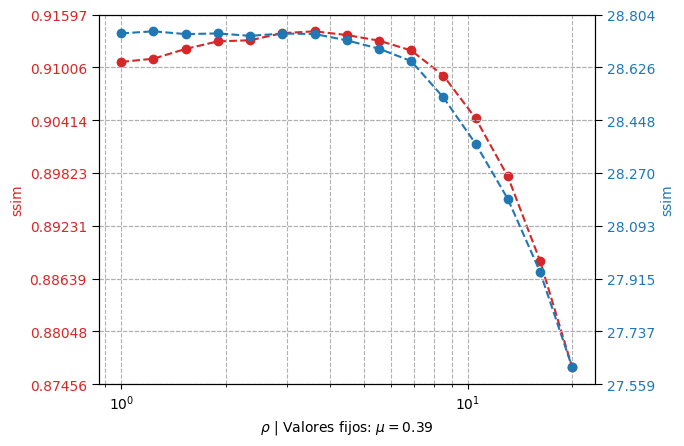

In [12]:
fig = plt.figure()
axes_1 = fig.add_subplot(111)
axes_2 = axes_1.twinx()

color = 'tab:red'
axes_1.set_xlabel(fr'$\rho$ | Valores fijos: $\mu={mu}$')
axes_1.set_ylabel('ssim', color=color)
axes_1.plot(performances[:, 0], performances[:, -2], '--o', color=color)
axes_1.tick_params(axis='y', labelcolor=color, length=5)
axes_1.yaxis.set_major_locator(MaxNLocator(8))
axes_1.set_xscale('log')
axes_1.grid(axis='both', which="both", linestyle='--')

axes_1.set_yticks(np.linspace(axes_1.get_ybound()[0], axes_1.get_ybound()[1], 8))

color = 'tab:blue'
axes_2.set_ylabel('ssim', color=color)
axes_2.plot(performances[:, 0], performances[:, -3], '--o', color=color)
axes_2.tick_params(axis='y', labelcolor=color, length=5)
axes_2.yaxis.set_major_locator(MaxNLocator(8))
axes_2.set_xscale('log')
axes_2.grid(axis='both', which="both", linestyle='--')

axes_2.set_yticks(np.linspace(axes_2.get_ybound()[0], axes_2.get_ybound()[1], 8))

plt.show()

# Running algorithm with real data

In [13]:
data_name = 'cube4.npy'
x = np.load('../Desarrollo/ReDS/data/' + data_name)
if len(x.shape) > 2:
    x = x[:, :, int(x.shape[-1] / 2)]

if data_name == 'data.npy':
    x = x.T
x = x / np.abs(x).max()

## Visualize real data

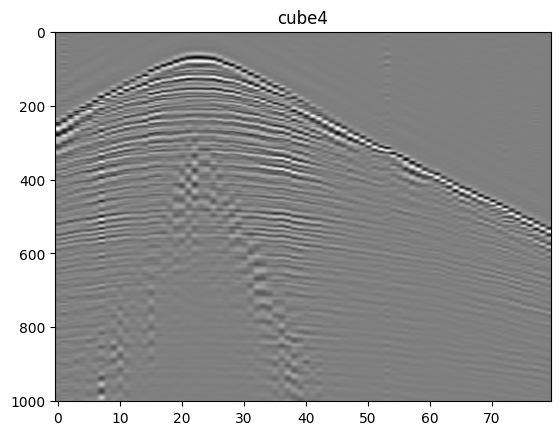

(<matplotlib.image.AxesImage at 0x2143f44f340>, Text(0.5, 1.0, 'cube4'), None)

In [14]:
plt.imshow(x, cmap='gray', aspect='auto'), plt.title('cube4'), plt.show()

## sampling data

In [15]:
sr_rand = 0.5  # 1-compression
y_rand, pattern_rand, pattern_index = random_sampling(x, sr_rand, seed=0)
H = pattern_index

## Recovery algorithm Fista

In [16]:
case = 'FISTA'
mu = 0.39
max_itr = 300

alg = Algorithms(x, H, 'DCT2D', 'IDCT2D', print_info=False)
lmbs = np.logspace(np.log10(50), np.log10(1000), 25)

parameters = {}
performances = []
for num_run, lmb in enumerate(product(lmbs)):
    print(f'Experimento {num_run + 1}')

    parameters = {'max_itr': max_itr,
                  'lmb': lmb[0],
                  'mu': 0.39
                  }

    x_result, hist = alg.get_results(case, **parameters)
    performances.append(np.concatenate([lmb, hist[-1, :]]))

performances = np.array(performances)

Experimento 1
H.shape=(40040, 80080)
Experimento 2
H.shape=(40040, 80080)
Experimento 3
H.shape=(40040, 80080)
Experimento 4
H.shape=(40040, 80080)
Experimento 5
H.shape=(40040, 80080)
Experimento 6
H.shape=(40040, 80080)
Experimento 7
H.shape=(40040, 80080)
Experimento 8
H.shape=(40040, 80080)
Experimento 9
H.shape=(40040, 80080)
Experimento 10
H.shape=(40040, 80080)
Experimento 11
H.shape=(40040, 80080)
Experimento 12
H.shape=(40040, 80080)
Experimento 13
H.shape=(40040, 80080)
Experimento 14
H.shape=(40040, 80080)
Experimento 15
H.shape=(40040, 80080)
Experimento 16
H.shape=(40040, 80080)
Experimento 17
H.shape=(40040, 80080)


C:\Users\EMMANUELMARTINEZ\Documents\Jobs\9836_seismic_project\Algorithms\Function.py:776: RuntimeWarning: invalid value encountered in double_scalars
  residualx = np.linalg.norm(x - x_old) / np.linalg.norm(x)


Experimento 18
H.shape=(40040, 80080)
Experimento 19
H.shape=(40040, 80080)
Experimento 20
H.shape=(40040, 80080)
Experimento 21
H.shape=(40040, 80080)
Experimento 22
H.shape=(40040, 80080)
Experimento 23
H.shape=(40040, 80080)
Experimento 24
H.shape=(40040, 80080)
Experimento 25
H.shape=(40040, 80080)


## Plot performance

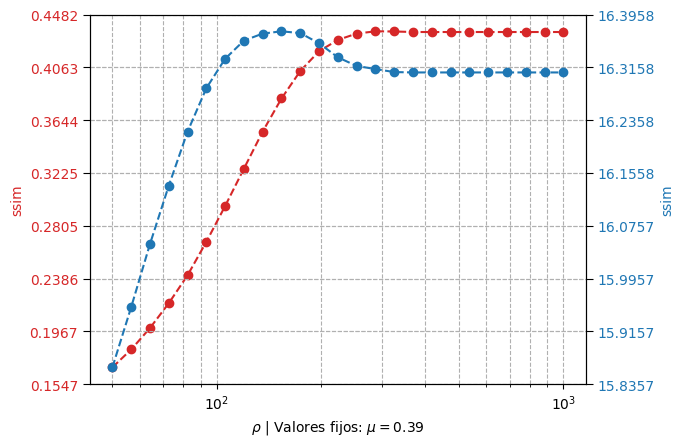

In [17]:
fig = plt.figure()
axes_1 = fig.add_subplot(111)
axes_2 = axes_1.twinx()

color = 'tab:red'
axes_1.set_xlabel(fr'$\rho$ | Valores fijos: $\mu={mu}$')
axes_1.set_ylabel('ssim', color=color)
axes_1.plot(performances[:, 0], performances[:, -2], '--o', color=color)
axes_1.tick_params(axis='y', labelcolor=color, length=5)
axes_1.yaxis.set_major_locator(MaxNLocator(8))
axes_1.set_xscale('log')
axes_1.grid(axis='both', which="both", linestyle='--')

axes_1.set_yticks(np.linspace(axes_1.get_ybound()[0], axes_1.get_ybound()[1], 8))

color = 'tab:blue'
axes_2.set_ylabel('ssim', color=color)
axes_2.plot(performances[:, 0], performances[:, -3], '--o', color=color)
axes_2.tick_params(axis='y', labelcolor=color, length=5)
axes_2.yaxis.set_major_locator(MaxNLocator(8))
axes_2.set_xscale('log')
axes_2.grid(axis='both', which="both", linestyle='--')

axes_2.set_yticks(np.linspace(axes_2.get_ybound()[0], axes_2.get_ybound()[1], 8))

plt.show()

## Probando con $\mu = 0.01$

In [18]:
case = 'FISTA'
mu = 0.01
max_itr = 300

alg = Algorithms(x, H, 'DCT2D', 'IDCT2D', print_info=False)
lmbs = np.logspace(np.log10(0.0001), np.log10(50), 30)

parameters = {}
performances = []
for num_run, lmb in enumerate(product(lmbs)):
    print(f'Experimento {num_run + 1}')

    parameters = {'max_itr': max_itr,
                  'lmb': lmb[0],
                  'mu': mu
                  }

    x_result, hist = alg.get_results(case, **parameters)
    performances.append(np.concatenate([lmb, hist[-1, :]]))

performances = np.array(performances)

Experimento 1
H.shape=(40040, 80080)
Experimento 2
H.shape=(40040, 80080)
Experimento 3
H.shape=(40040, 80080)
Experimento 4
H.shape=(40040, 80080)
Experimento 5
H.shape=(40040, 80080)
Experimento 6
H.shape=(40040, 80080)
Experimento 7
H.shape=(40040, 80080)
Experimento 8
H.shape=(40040, 80080)
Experimento 9
H.shape=(40040, 80080)
Experimento 10
H.shape=(40040, 80080)
Experimento 11
H.shape=(40040, 80080)
Experimento 12
H.shape=(40040, 80080)
Experimento 13
H.shape=(40040, 80080)
Experimento 14
H.shape=(40040, 80080)
Experimento 15
H.shape=(40040, 80080)
Experimento 16
H.shape=(40040, 80080)
Experimento 17
H.shape=(40040, 80080)
Experimento 18
H.shape=(40040, 80080)
Experimento 19
H.shape=(40040, 80080)
Experimento 20
H.shape=(40040, 80080)
Experimento 21
H.shape=(40040, 80080)
Experimento 22
H.shape=(40040, 80080)
Experimento 23
H.shape=(40040, 80080)
Experimento 24
H.shape=(40040, 80080)
Experimento 25
H.shape=(40040, 80080)
Experimento 26
H.shape=(40040, 80080)
Experimento 27
H.shap

C:\Users\EMMANUELMARTINEZ\Documents\Jobs\9836_seismic_project\Algorithms\Function.py:776: RuntimeWarning: invalid value encountered in double_scalars
  residualx = np.linalg.norm(x - x_old) / np.linalg.norm(x)


Experimento 28
H.shape=(40040, 80080)
Experimento 29
H.shape=(40040, 80080)
Experimento 30
H.shape=(40040, 80080)


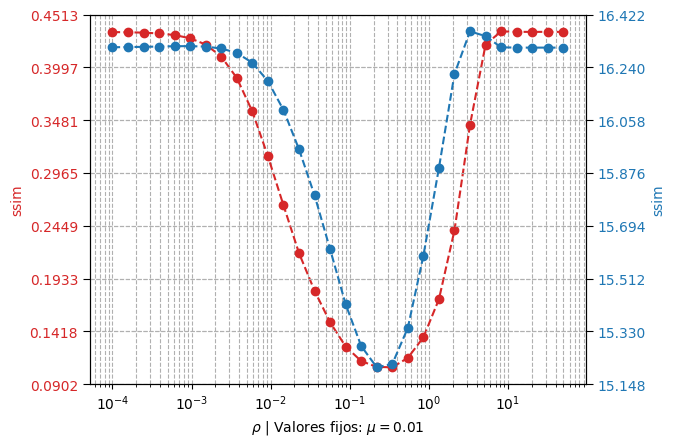

In [19]:
fig = plt.figure()
axes_1 = fig.add_subplot(111)
axes_2 = axes_1.twinx()

color = 'tab:red'
axes_1.set_xlabel(fr'$\rho$ | Valores fijos: $\mu={mu}$')
axes_1.set_ylabel('ssim', color=color)
axes_1.plot(performances[:, 0], performances[:, -2], '--o', color=color)
axes_1.tick_params(axis='y', labelcolor=color, length=5)
axes_1.yaxis.set_major_locator(MaxNLocator(8))
axes_1.set_xscale('log')
axes_1.grid(axis='both', which="both", linestyle='--')

axes_1.set_yticks(np.linspace(axes_1.get_ybound()[0], axes_1.get_ybound()[1], 8))

color = 'tab:blue'
axes_2.set_ylabel('ssim', color=color)
axes_2.plot(performances[:, 0], performances[:, -3], '--o', color=color)
axes_2.tick_params(axis='y', labelcolor=color, length=5)
axes_2.yaxis.set_major_locator(MaxNLocator(8))
axes_2.set_xscale('log')
axes_2.grid(axis='both', which="both", linestyle='--')

axes_2.set_yticks(np.linspace(axes_2.get_ybound()[0], axes_2.get_ybound()[1], 8))

plt.show()

## Probando con $\mu = 1$

In [20]:
case = 'FISTA'
mu = 1
max_itr = 300

alg = Algorithms(x, H, 'DCT2D', 'IDCT2D', print_info=False)
lmbs = np.logspace(np.log10(0.0001), np.log10(1000), 25)

parameters = {}
performances = []
for num_run, lmb in enumerate(product(lmbs)):
    print(f'Experimento {num_run + 1}')

    parameters = {'max_itr': max_itr,
                  'lmb': lmb[0],
                  'mu': mu
                  }

    x_result, hist = alg.get_results(case, **parameters)
    performances.append(np.concatenate([lmb, hist[-1, :]]))

performances = np.array(performances)

Experimento 1
H.shape=(40040, 80080)
Experimento 2
H.shape=(40040, 80080)
Experimento 3
H.shape=(40040, 80080)
Experimento 4
H.shape=(40040, 80080)
Experimento 5
H.shape=(40040, 80080)
Experimento 6
H.shape=(40040, 80080)
Experimento 7
H.shape=(40040, 80080)
Experimento 8
H.shape=(40040, 80080)
Experimento 9
H.shape=(40040, 80080)
Experimento 10
H.shape=(40040, 80080)
Experimento 11
H.shape=(40040, 80080)
Experimento 12
H.shape=(40040, 80080)
Experimento 13
H.shape=(40040, 80080)
Experimento 14
H.shape=(40040, 80080)
Experimento 15
H.shape=(40040, 80080)
Experimento 16
H.shape=(40040, 80080)
Experimento 17
H.shape=(40040, 80080)
Experimento 18
H.shape=(40040, 80080)
Experimento 19
H.shape=(40040, 80080)
Experimento 20
H.shape=(40040, 80080)
Experimento 21
H.shape=(40040, 80080)
Experimento 22
H.shape=(40040, 80080)
Experimento 23
H.shape=(40040, 80080)
Experimento 24
H.shape=(40040, 80080)
Experimento 25
H.shape=(40040, 80080)


C:\Users\EMMANUELMARTINEZ\Documents\Jobs\9836_seismic_project\Algorithms\Function.py:776: RuntimeWarning: invalid value encountered in double_scalars
  residualx = np.linalg.norm(x - x_old) / np.linalg.norm(x)


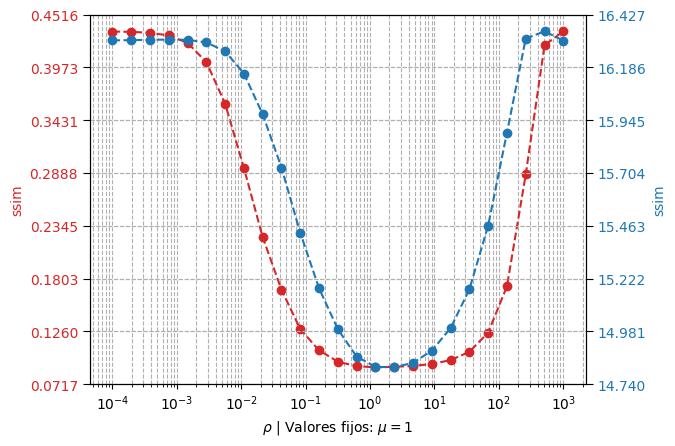

In [21]:
fig = plt.figure()
axes_1 = fig.add_subplot(111)
axes_2 = axes_1.twinx()

color = 'tab:red'
axes_1.set_xlabel(fr'$\rho$ | Valores fijos: $\mu={mu}$')
axes_1.set_ylabel('ssim', color=color)
axes_1.plot(performances[:, 0], performances[:, -2], '--o', color=color)
axes_1.tick_params(axis='y', labelcolor=color, length=5)
axes_1.yaxis.set_major_locator(MaxNLocator(8))
axes_1.set_xscale('log')
axes_1.grid(axis='both', which="both", linestyle='--')

axes_1.set_yticks(np.linspace(axes_1.get_ybound()[0], axes_1.get_ybound()[1], 8))

color = 'tab:blue'
axes_2.set_ylabel('ssim', color=color)
axes_2.plot(performances[:, 0], performances[:, -3], '--o', color=color)
axes_2.tick_params(axis='y', labelcolor=color, length=5)
axes_2.yaxis.set_major_locator(MaxNLocator(8))
axes_2.set_xscale('log')
axes_2.grid(axis='both', which="both", linestyle='--')

axes_2.set_yticks(np.linspace(axes_2.get_ybound()[0], axes_2.get_ybound()[1], 8))

plt.show()

## Probando con $\mu = 10$

In [22]:
case = 'FISTA'
mu = 10
max_itr = 300

alg = Algorithms(x, H, 'DCT2D', 'IDCT2D', print_info=False)
lmbs = np.logspace(np.log10(0.0001), np.log10(1000), 25)

parameters = {}
performances = []
for num_run, lmb in enumerate(product(lmbs)):
    print(f'Experimento {num_run + 1}')

    parameters = {'max_itr': max_itr,
                  'lmb': lmb[0],
                  'mu': mu
                  }

    x_result, hist = alg.get_results(case, **parameters)
    performances.append(np.concatenate([lmb, hist[-1, :]]))

performances = np.array(performances)

Experimento 1
H.shape=(40040, 80080)


C:\Users\EMMANUELMARTINEZ\anaconda3\envs\cosad\lib\site-packages\skimage\metrics\_structural_similarity.py:207: RuntimeWarning: overflow encountered in multiply
  D = B1 * B2
C:\Users\EMMANUELMARTINEZ\Documents\Jobs\9836_seismic_project\Algorithms\Function.py:776: RuntimeWarning: invalid value encountered in double_scalars
  residualx = np.linalg.norm(x - x_old) / np.linalg.norm(x)
C:\Users\EMMANUELMARTINEZ\Documents\Jobs\9836_seismic_project\Algorithms\tv_norm.py:10: RuntimeWarning: overflow encountered in square
  return np.sqrt(grad_x1[:, :-1] ** 2 + grad_x2[:-1, :] ** 2).sum()
C:\Users\EMMANUELMARTINEZ\Documents\Jobs\9836_seismic_project\Algorithms\tv_norm.py:10: RuntimeWarning: overflow encountered in add
  return np.sqrt(grad_x1[:, :-1] ** 2 + grad_x2[:-1, :] ** 2).sum()
C:\Users\EMMANUELMARTINEZ\anaconda3\envs\cosad\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\E

Experimento 2
H.shape=(40040, 80080)
Experimento 3
H.shape=(40040, 80080)
Experimento 4
H.shape=(40040, 80080)
Experimento 5
H.shape=(40040, 80080)
Experimento 6
H.shape=(40040, 80080)
Experimento 7
H.shape=(40040, 80080)
Experimento 8
H.shape=(40040, 80080)
Experimento 9
H.shape=(40040, 80080)
Experimento 10
H.shape=(40040, 80080)
Experimento 11
H.shape=(40040, 80080)
Experimento 12
H.shape=(40040, 80080)
Experimento 13
H.shape=(40040, 80080)
Experimento 14
H.shape=(40040, 80080)
Experimento 15
H.shape=(40040, 80080)
Experimento 16
H.shape=(40040, 80080)
Experimento 17
H.shape=(40040, 80080)
Experimento 18
H.shape=(40040, 80080)
Experimento 19
H.shape=(40040, 80080)
Experimento 20
H.shape=(40040, 80080)
Experimento 21
H.shape=(40040, 80080)
Experimento 22
H.shape=(40040, 80080)
Experimento 23
H.shape=(40040, 80080)
Experimento 24
H.shape=(40040, 80080)
Experimento 25
H.shape=(40040, 80080)


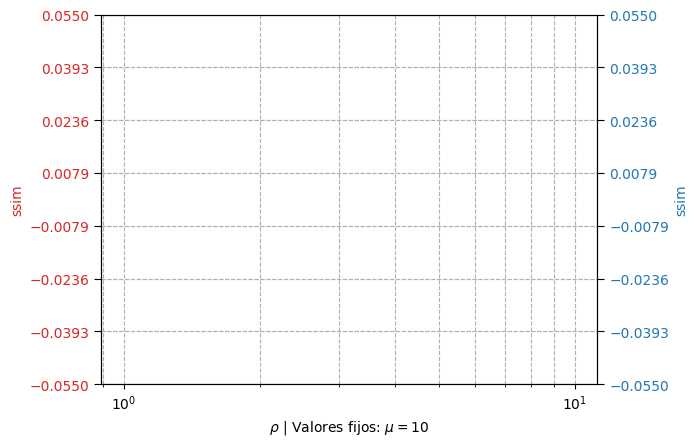

In [23]:
fig = plt.figure()
axes_1 = fig.add_subplot(111)
axes_2 = axes_1.twinx()

color = 'tab:red'
axes_1.set_xlabel(fr'$\rho$ | Valores fijos: $\mu={mu}$')
axes_1.set_ylabel('ssim', color=color)
axes_1.plot(performances[:, 0], performances[:, -2], '--o', color=color)
axes_1.tick_params(axis='y', labelcolor=color, length=5)
axes_1.yaxis.set_major_locator(MaxNLocator(8))
axes_1.set_xscale('log')
axes_1.grid(axis='both', which="both", linestyle='--')

axes_1.set_yticks(np.linspace(axes_1.get_ybound()[0], axes_1.get_ybound()[1], 8))

color = 'tab:blue'
axes_2.set_ylabel('ssim', color=color)
axes_2.plot(performances[:, 0], performances[:, -3], '--o', color=color)
axes_2.tick_params(axis='y', labelcolor=color, length=5)
axes_2.yaxis.set_major_locator(MaxNLocator(8))
axes_2.set_xscale('log')
axes_2.grid(axis='both', which="both", linestyle='--')

axes_2.set_yticks(np.linspace(axes_2.get_ybound()[0], axes_2.get_ybound()[1], 8))

plt.show()

# Observaciones finales

* Se debe estandarizar la lectura de los parametros, e.g. un rango entre cero y uno.
* Se debe mejorar la reconstrucción de datos reales o más realistas.